In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\Devrim\\OneDrive\\Masaüstü\\GlobalLandTemperaturesByCity.csv", parse_dates=['dt']) 
#parse_dates parametresi bir tarih sütununu datetime türüne çevirir.
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
data.dtypes #veri türlerine bakalım.

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [4]:
data.info() #veri hakkında daha detaylı bir bilgiye sahip olalım.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,8235082.0,16.727433,10.353442,-42.704,10.299,18.831,25.210,39.651
AverageTemperatureUncertainty,8235082.0,1.028575,1.129733,0.034,0.337,0.591,1.349,15.396


In [6]:
# %pip install pyarrow
#data.to_pickle
#data.to_parquet

In [7]:
data.shape #ile verimizin boyutuna bakalım.

(8599212, 7)

In [8]:
data.isna().sum() #hangi sütunda kaç tane boş değer var bakalım.

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [9]:
data.isna().sum() / data.shape[0] * 100 #yüzdesel olarak kayıplara bakalım.

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [10]:
data.shape

(8599212, 7)

In [11]:
data_prepared = data.dropna(axis = 0, how = 'any')  #Boş olan kayıtları silelim.
data_prepared.shape

(8235082, 7)

In [12]:
data_prepared.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [13]:
data_prepared["Country"].value_counts() #Ülkelere göre kayıt sayılarına bakalım.

India               960548
China               819132
United States       661524
Brazil              451645
Russia              448663
                     ...  
Burundi               1675
Eritrea               1669
Djibouti              1658
Oman                  1652
Papua New Guinea      1580
Name: Country, Length: 159, dtype: int64

In [14]:
data_prepared["Country"].value_counts().shape #Kaç tane ülke var ona bakalım.

(159,)

In [15]:
data_prepared[data_prepared["Country"] == "Turkey"] #Country değerinin "Turkey" olduğu kayıtları alalım.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [16]:
data_prepared[(data_prepared["Country"] == "Turkey") | (data_prepared["Country"] == "Brazil")] 
#Country değerinin "Turkey" veya "Brazil" olduğu kayıtları alalım.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [17]:
data_prepared[(data_prepared["Country"] == "Turkey") & (data_prepared["AverageTemperature"] > 20)] 
#Country değeri "Turkey" olan ve "AverageTemperature"ı 20’den büyük olan değerleri alalım.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
3318,1750-06-01,20.183,1.685,Çorlu,Turkey,40.99N,27.69E
3319,1750-07-01,24.420,1.603,Çorlu,Turkey,40.99N,27.69E
3320,1750-08-01,23.217,1.692,Çorlu,Turkey,40.99N,27.69E
3330,1751-06-01,21.248,1.740,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585419,2012-06-01,20.797,0.353,Zonguldak,Turkey,40.99N,31.95E
8585420,2012-07-01,23.516,0.298,Zonguldak,Turkey,40.99N,31.95E
8585421,2012-08-01,21.869,0.767,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [18]:
data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]
#Country değeri "Turkey", "Brazil", "United States" olanları getirelim.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [19]:
data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]["Country"].value_counts()
#Sadece bu 3 ülkenin veride kaç kaydı var ona bakalım.

United States    661524
Brazil           451645
Turkey           147086
Name: Country, dtype: int64

In [20]:
data_selected = data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [21]:
#Ülkelere göre ortalama sıcaklıklara bakalım.
data_selected.groupby(by="Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,21.902763,0.869764
Turkey,12.951888,1.275864
United States,13.949335,1.089550


In [22]:
#Ülkelere göre maximum sıcaklıklara bakalım.
data_selected.groupby(by="Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,30.495,5.277,Várzea Paulista,8.84S,67.91W
Turkey,2013-08-01,32.885,9.237,Çorum,42.59N,42.71E
United States,2013-09-01,34.379,10.519,Yonkers,61.88N,99.24W


In [23]:
#Minimum, maximum ve ortalama değerlerini tek bir tabloda gözlemleyelim.
#data_selected.groupby(by="Country").agg(["min","mean","max"])

#### Bu 3 ülke ile görselleştirmeler;

In [24]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [25]:
tr_average_temps = data_selected[data_selected["Country"] == "Turkey"]["AverageTemperature"]
tr_average_temps.head()

3239    10.013
3244    13.685
3245    15.021
3246    19.663
3247    22.314
Name: AverageTemperature, dtype: float64

C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AverageTemperature', ylabel='Density'>

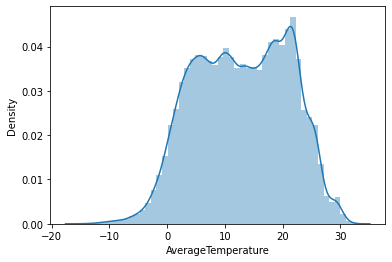

In [26]:
#Bu değerleri bir dağılım grafiğinde gösterelim.
sns.distplot(tr_average_temps)

C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AverageTemperature', ylabel='Density'>

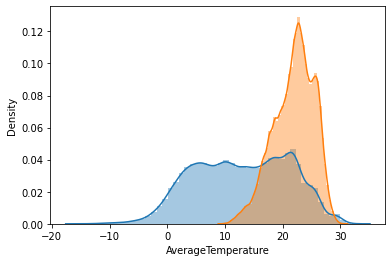

In [27]:
#Bu dağılım grafiğine bir de Brazil değerlerini ekleyelim.
br_average_temps = data_selected[data_selected["Country"] == "Brazil"]["AverageTemperature"]
sns.distplot(tr_average_temps)
sns.distplot(br_average_temps)
#Turkey : Mavi, Brazil : Sarı

In [28]:
data_selected["Country"].value_counts().index

Index(['United States', 'Brazil', 'Turkey'], dtype='object')

In [34]:
ulkeler = data_selected["Country"].unique()
ulkeler

array(['Turkey', 'United States', 'Brazil'], dtype=object)

C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\

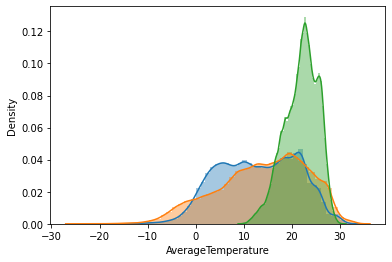

In [35]:
#3 ülkeyi de alalım.
for ulke in ulkeler:
    data = data_selected[data_selected["Country"] == ulke]["AverageTemperature"]
    sns.distplot(data)

C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\

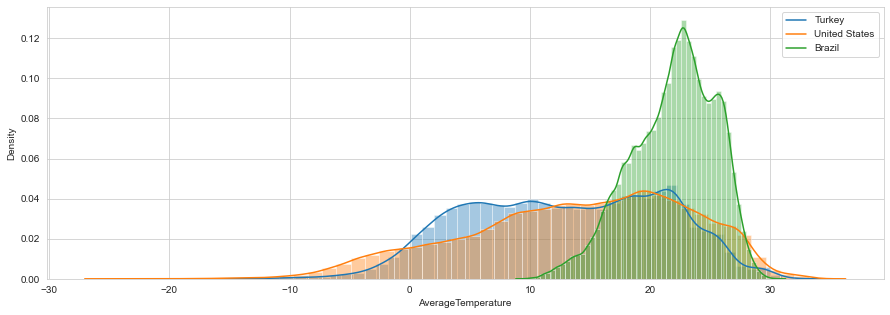

In [36]:
#Grafiğimizi daha okunur hale getirelim.
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ulkeler = data_selected["Country"].unique()

for ulke in ulkeler:
    data = data_selected[data_selected["Country"] == ulke]["AverageTemperature"]
    sns.distplot(data)

plt.legend(ulkeler)


C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\

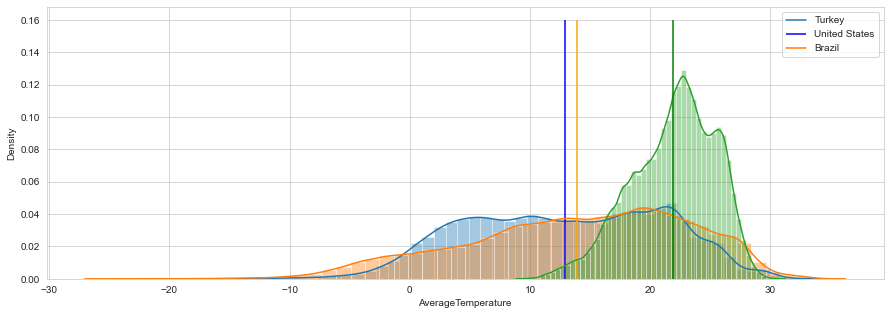

In [38]:
#Bu kategorik değerlerin bir de ortalama çizgilerini ekleyelim.
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
colors = ["blue", "orange", "green"]

for color,ulke in zip(colors, ulkeler):
    data = data_selected[data_selected["Country"] == ulke]["AverageTemperature"]
    sns.distplot(data)
    ulke_mean = data_selected[data_selected["Country"] == ulke]["AverageTemperature"].mean()
    plt.vlines(ulke_mean, 0, 0.16, colors=color)

plt.legend(ulkeler)


#### Tam Otomatikleştirme;

C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\

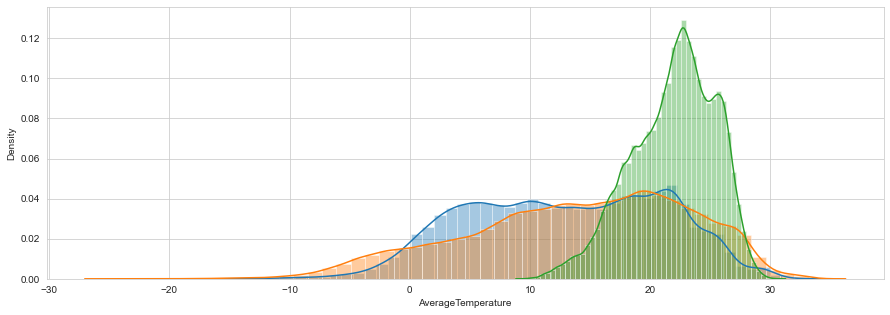

C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devrim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\

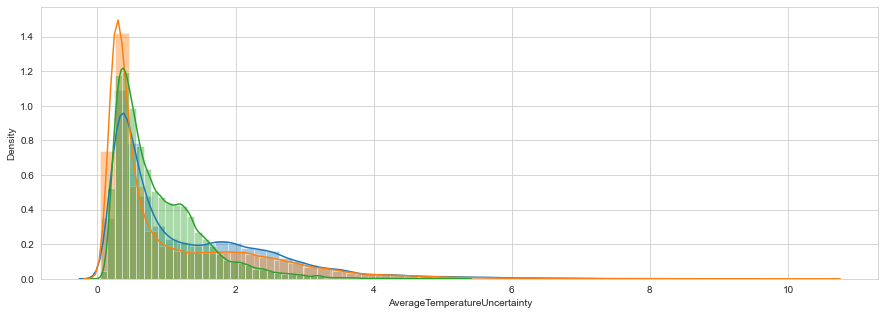

In [39]:
#3 ülkeyi içeren 2 görselleştirme yapalım biri AverageTemperature diğeri AverageTemperatureUncertainty için.
kolonlar = data_selected.columns[1:3] #AverageTemperature ve  AverageTemperatureUncertainty.
ulkeler = data_selected["Country"].unique()

for kolon in kolonlar:
    plt.figure(figsize=(15,5))
    for ulke in ulkeler:
        data = data_selected[data_selected["Country"] == ulke][kolon]
        sns.distplot(data)
    plt.show()


#### Scatterplot ile Görselleştirme;

In [40]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [52]:
#1990 sonrası Türkiye’deki sıcaklık değerlerini alalım.
tr_data = data_selected[(data_selected["Country"] == "Turkey") & (data_selected["dt"] > "01.01.1900")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5114,1900-02-01,7.639,0.601,Çorlu,Turkey,40.99N,27.69E
5115,1900-03-01,5.745,0.779,Çorlu,Turkey,40.99N,27.69E
5116,1900-04-01,10.871,0.703,Çorlu,Turkey,40.99N,27.69E
5117,1900-05-01,15.640,0.423,Çorlu,Turkey,40.99N,27.69E
5118,1900-06-01,19.994,0.448,Çorlu,Turkey,40.99N,27.69E


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

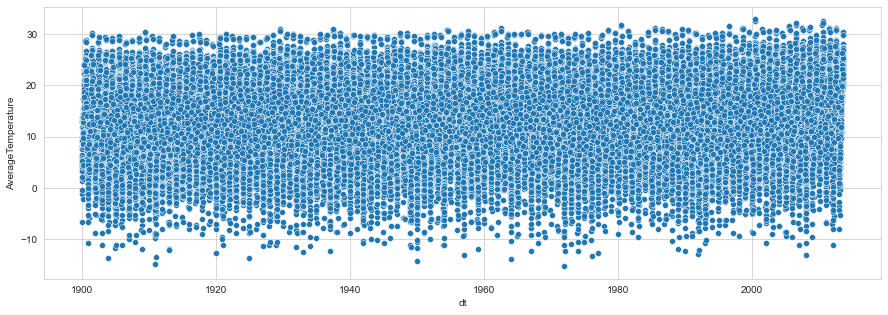

In [53]:
plt.figure(figsize =(15, 5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

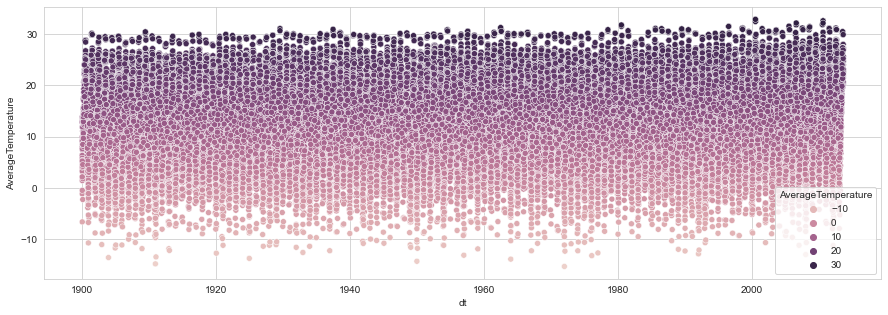

In [54]:
plt.figure(figsize =(15, 5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data,hue="AverageTemperature")

In [55]:
#Yıla göre gruplayalım ve her yılın ortalamasını getirelim.
tr_data_means = tr_data.groupby(tr_data["dt"].dt.to_period("Y")).mean()
tr_data_means = tr_data_means.reset_index()
tr_data_means 


,dt,AverageTemperature,AverageTemperatureUncertainty
0,1900,14.204863,0.624239
1,1901,13.691832,0.717858
2,1902,12.978845,0.726910
3,1903,12.754485,0.641859
4,1904,12.598167,0.703698
...,...,...,...
109,2009,14.194766,0.369637
110,2010,15.483237,0.438613
111,2011,13.278969,0.414487
112,2012,14.221969,0.496595


In [56]:
tr_data_means["dt"] = tr_data_means["dt"].astype("string").astype("datetime64")

In [57]:
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


#### Lineplot;

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

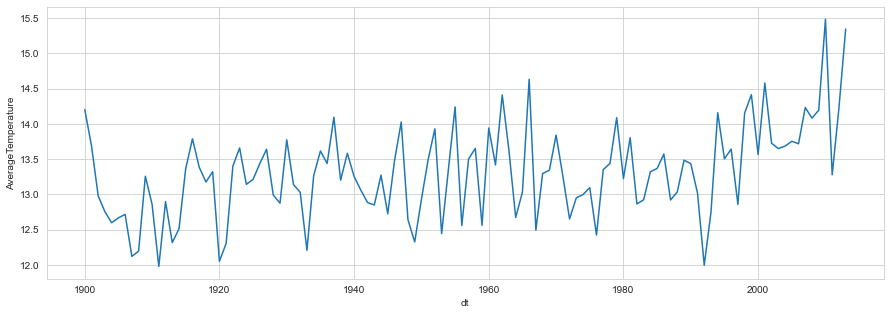

In [58]:
plt.figure(figsize =(15, 5))
sns.lineplot(x="dt", y="AverageTemperature", data=tr_data_means)

In [61]:
#3 ülke için yapalım;
data_1900 = data_selected[data_selected["dt"] > "01.01.1900"]
data_1900.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5114,1900-02-01,7.639,0.601,Çorlu,Turkey,40.99N,27.69E
5115,1900-03-01,5.745,0.779,Çorlu,Turkey,40.99N,27.69E
5116,1900-04-01,10.871,0.703,Çorlu,Turkey,40.99N,27.69E
5117,1900-05-01,15.640,0.423,Çorlu,Turkey,40.99N,27.69E
5118,1900-06-01,19.994,0.448,Çorlu,Turkey,40.99N,27.69E


In [66]:
data_mean = data_1900.groupby(["Country", data_1900["dt"].dt.to_period("Y")]).mean()
data_means = data_mean.reset_index()
data_means["dt"] = data_means["dt"].astype("string").astype("datetime64")
data_means

,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,Brazil,1900-01-01,21.926007,1.053715
1,Brazil,1901-01-01,21.655498,1.060403
2,Brazil,1902-01-01,22.122958,0.819225
3,Brazil,1903-01-01,21.856554,0.966928
4,Brazil,1904-01-01,21.233172,1.038665
...,...,...,...,...
337,United States,2009-01-01,14.803492,0.296085
338,United States,2010-01-01,14.883878,0.289500
339,United States,2011-01-01,15.101007,0.304523
340,United States,2012-01-01,15.959264,0.336159


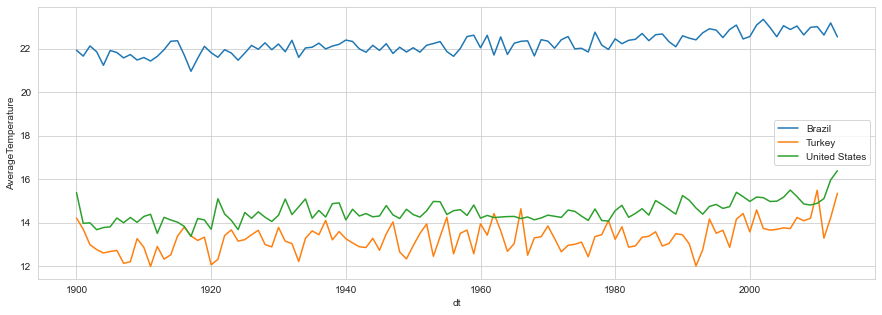

In [69]:
plt.figure(figsize =(15, 5))
for ulke in data_means["Country"].unique():
    data = data_means[data_means["Country"] == ulke]
    sns.lineplot(x="dt", y="AverageTemperature", data=data)

plt.legend(data_means["Country"].unique())

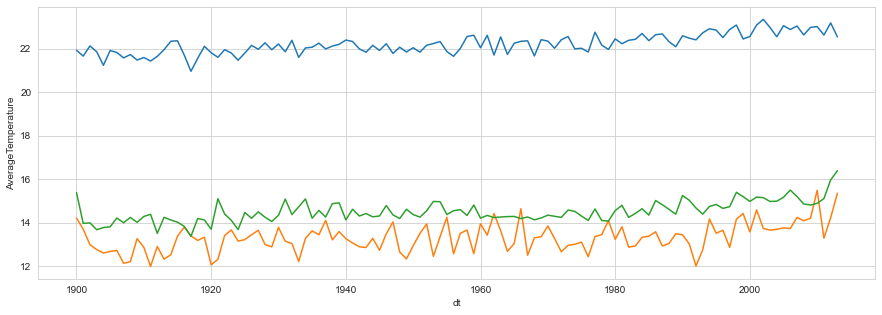

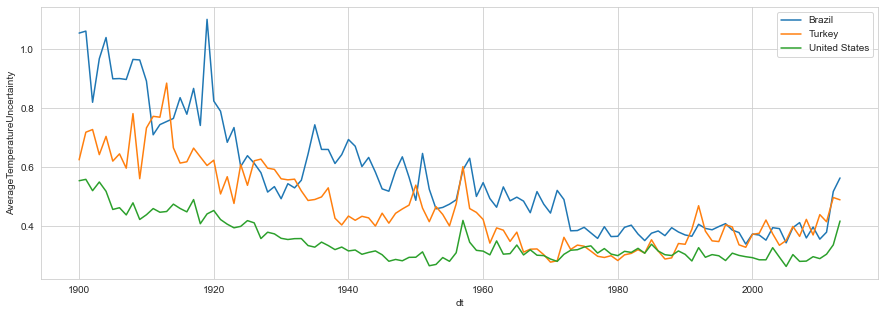

In [70]:
#AverageTemperature ve AverageTemperatureUncertainty için yapalım;
for col in data_means.columns[2:4]:
    plt.figure(figsize =(15, 5))
    
    for ulke in data_means["Country"].unique():
        data = data_means[data_means["Country"] == ulke]
        sns.lineplot(x="dt", y=col, data=data)

plt.legend(data_means["Country"].unique())